# [S24] Introduction to Machine Learning: Bonus assignment
**Student name:** Hayder Sarhan

**Student email:** h.sarhan@innopolis.university

In [4]:
import tensorflow as tf
from tensorflow import keras

## Task 1. Baseline model [0pt]

(refrence): https://www.tensorflow.org/tutorials/keras/save_and_load#manually_save_weights

### Loading the pre-trained baseline model

We load a pre-trained convolutional neural network (CNN) model named 'custom_CNN_model'.

In [5]:
!unzip ./HayderSarhan.zip

Archive:  ./HayderSarhan.zip
   creating: HayderSarhan/
   creating: HayderSarhan/assets/
 extracting: HayderSarhan/fingerprint.pb  
  inflating: HayderSarhan/keras_metadata.pb  
  inflating: HayderSarhan/saved_model.pb  
   creating: HayderSarhan/variables/
  inflating: HayderSarhan/variables/variables.data-00000-of-00001  
  inflating: HayderSarhan/variables/variables.index  


In [6]:
# Load the pre-trained model
custom_model = keras.models.load_model('HayderSarhan')

# Get the weights of the model
weights = custom_model.get_weights()

print("Weights of the model:")
print(weights)

Weights of the model:
[array([[[[-8.82382169e-02,  8.43576714e-02, -1.02662658e-02, ...,
           3.78039340e-03, -2.26705134e-01,  2.65229680e-02],
         [-1.07111409e-01, -1.68465108e-01,  5.37143229e-03, ...,
           5.64370677e-02, -2.88908839e-01, -9.57500935e-02],
         [-1.52080819e-01, -2.41028592e-01, -6.71555027e-02, ...,
           1.64995678e-02, -1.63126271e-02, -2.15501972e-02]],

        [[-1.21744379e-01,  4.25934345e-02, -3.46228406e-02, ...,
           1.32132545e-02, -2.76965141e-01, -9.87763032e-02],
         [-1.36163786e-01, -4.10882570e-02, -5.84632754e-02, ...,
          -8.08359161e-02, -2.46294186e-01, -6.97479621e-02],
         [-1.33078322e-01, -2.46433660e-01, -6.91459849e-02, ...,
          -5.84813766e-02, -1.29856646e-01, -6.53196499e-02]],

        [[-6.81419894e-02, -4.20862623e-02,  4.28830385e-02, ...,
          -6.37742579e-02, -2.24170804e-01, -6.55276477e-02],
         [-3.85309458e-02, -2.58970112e-02, -3.75102796e-02, ...,
          -

In [7]:
# Display the architecture of the loaded model
custom_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0   

## Task 2. Self-supervised learning [12pts]

### **Part I:** Autoencoder

- **List of references:**
    - https://www.youtube.com/watch?v=JoR5HCs0n0s
    - https://www.kaggle.com/code/milan400/cifar10-autoencoder

In [8]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Loading the CIFAR-10 Dataset

We load the images from the CIFAR-10 dataset

In [9]:
# Load the CIFAR-10 dataset
# We are only interested in the images (not the labels), so we discard the labels by assigning them to _
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


### Preprocessing the CIFAR-10 Dataset
- **Normalizing the data:**  We normalize the pixel values of the images to the range [0, 1] by dividing by 255 (since pixel values range from 0 to 255). This normalization helps with the training of the model.

In [10]:
# Normalize the pixel values of the images to the range [0, 1]
X_train = x_train / 255
X_test = x_test / 255

In [11]:
# Print the shapes of the CIFAR-10 data arrays
print('The Shape of the CIFAR-10 data:')
print('===============================')
print(f'The shape of the images(x_train, x_test): {x_train.shape} | {x_test.shape}')

The Shape of the CIFAR-10 data:
The shape of the images(x_train, x_test): (50000, 32, 32, 3) | (10000, 32, 32, 3)


#### Creating the Autoencoder

##### **Encoder layers and model**

In [12]:
# Define the input to the encoder
encoder_input = keras.Input(shape=(32, 32, 3))

# Add a Conv2D layer with 32 filters of size (3, 3), 'relu' activation, and 'same' padding
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
# Add a Batch Normalization layer
input = keras.layers.BatchNormalization()(input)
# Add a Max Pooling layer of size (2, 2) with 'same' padding
input = keras.layers.MaxPooling2D((2, 2), padding='same')(input)
# Add a Dropout layer with a rate of 0.2
input = keras.layers.Dropout(0.2)(input)
# Add another Conv2D layer with 32 filters of size (3, 3), 'relu' activation, and 'same' padding
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
# Flatten the output of the last Conv2D layer
input = keras.layers.Flatten()(input)

# Add a Dense layer with 256 units and 'relu' activation to produce the encoded representation
encoder_output = keras.layers.Dense(256, activation='relu')(input)

# Create the encoder model with the specified input and output
encoder = keras.Model(encoder_input, encoder_output)

# Display the architecture of the encoder model
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248  

##### **Decoder Layers**

In [13]:
# Define the input to the decoder
decoder_input = keras.layers.Dense(1024, activation='relu')(encoder_output)

# Reshape the output of the Dense layer to (8, 8, 16)
input = keras.layers.Reshape((8, 8, 16))(decoder_input)

# Add a Conv2D layer with 32 filters of size (3, 3), 'relu' activation, and 'same' padding
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
# Add a Batch Normalization layer
input = keras.layers.BatchNormalization()(input)
# Add an UpSampling2D layer of size (2, 2)
input = keras.layers.UpSampling2D((2, 2))(input)
# Add another Conv2D layer with 32 filters of size (3, 3), 'relu' activation, and 'same' padding
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
# Add another Batch Normalization layer
input = keras.layers.BatchNormalization()(input)
# Add another UpSampling2D layer of size (2, 2)
input = keras.layers.UpSampling2D((2, 2))(input)

# Add a Conv2D layer with 3 filters of size (1, 1), 'sigmoid' activation, and 'same' padding to produce the reconstructed image
decoder_output = keras.layers.Conv2D(3, (1, 1), activation='sigmoid', padding='same')(input)

##### **Autoencoder model**

In [14]:
# Create the Autoencoder model by combining the encoder and decoder
auto_encoder = keras.Model(encoder_input, decoder_output, name='auto_encoder')

# Display the architecture of the Autoencoder model
auto_encoder.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)       

#### Compiling the model


In [15]:
# Compile the Autoencoder model
# We use the Adam optimizer with a learning rate of 0.0001, the 'mean_squared_error' loss function, and monitor 'accuracy' during training
auto_encoder.compile(optimizer=keras.optimizers.Adam(0.0001), loss='mean_squared_error', metrics=['accuracy'])

In [16]:
auto_encoder.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)       

#### Training the model
We pass the training data and labels (which are the same, since we are training an Autoencoder).

In [17]:
# Train the Autoencoder model on the CIFAR-10 dataset
history = auto_encoder.fit(X_train, X_train,
                           epochs=50,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 14s 29ms/step - loss: 0.0344 - accuracy: 0.4235 - val_loss: 0.0513 - val_accuracy: 0.4357
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 0.0177 - accuracy: 0.5184 - val_loss: 0.0302 - val_accuracy: 0.5123
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0146 - accuracy: 0.5633 - val_loss: 0.0142 - val_accuracy: 0.5814
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0131 - accuracy: 0.5883 - val_loss: 0.0122 - val_accuracy: 0.6005
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0122 - accuracy: 0.6051 - val_loss: 0.0116 - val_accuracy: 0.6110
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0116 - accuracy: 0.6197 - val_loss: 0.0110 - val_accuracy: 0.6271
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0111 - accuracy: 0.6340 - val_loss: 0.0106 - val_accuracy: 0.640

### Ploting the values we got

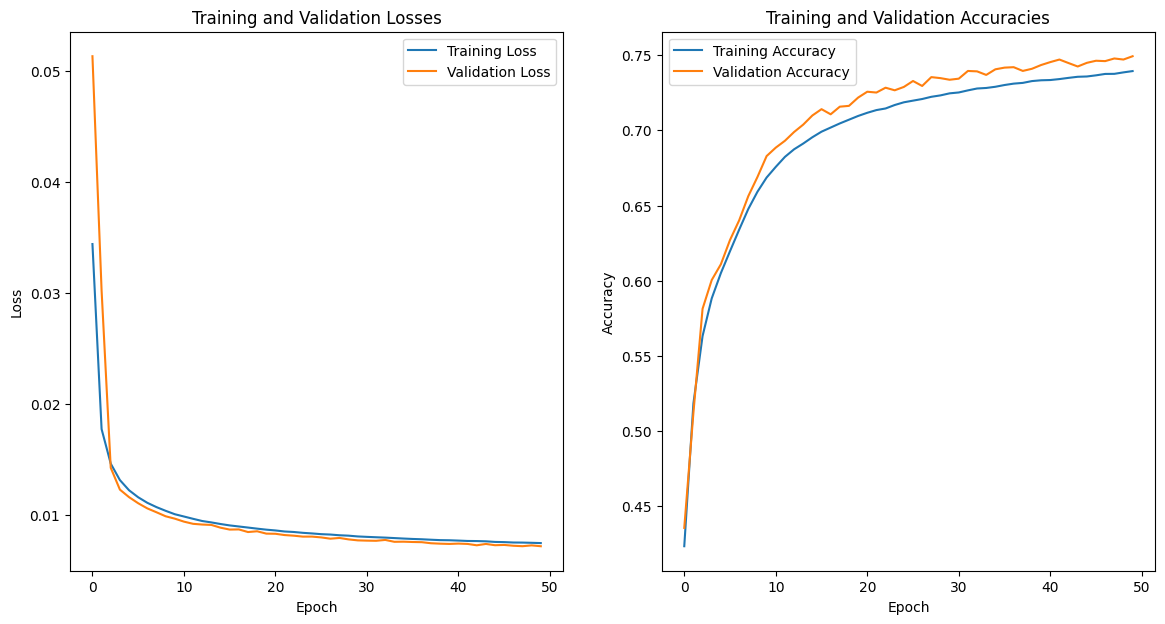

In [18]:
# Create a figure with two subplots
plt.figure(figsize=(14, 7))

# Plotting training and validation losses
plt.subplot(1, 2, 1)
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
# Add a title to the subplot
plt.title('Training and Validation Losses')
# Add labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Add a legend to the subplot
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
# Plot the training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# Add a title to the subplot
plt.title('Training and Validation Accuracies')
# Add labels for the x and y axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Add a legend to the subplot
plt.legend()

# Display the figure
plt.show()

### Evaluation

In [19]:
# Evaluate the model on the entire test set
autoencoder_test_loss, autoencoder_test_accuracy = auto_encoder.evaluate(x_test, x_test)
print(f"AutoEncoder Test Loss: {autoencoder_test_loss}")
print(f"AutoEncoder Test Accuracy: {autoencoder_test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 18631.1133 - accuracy: 0.5084
AutoEncoder Test Loss: 18631.11328125
AutoEncoder Test Accuracy: 0.5083633065223694


### **Part II:** Freezing the encoder and training the new model

In [20]:
# Set the 'trainable' attribute of the encoder model to False to freeze the encoder model
encoder.trainable = False

In [21]:
# Define the input to the classifier model
inputs = keras.Input(shape=(32, 32, 3))

# Pass the input through the encoder model
input = encoder(inputs, training=False)

# Pass the output of the encoder through a Dense layer with 128 units and 'relu' activation
input = keras.layers.Dense(128, activation='relu')(input)
# Pass the output of the first Dense layer through another Dense layer with 64 units and 'relu' activation
input = keras.layers.Dense(64, activation='relu')(input)

# Pass the output of the second Dense layer through a Dense layer with 10 units and 'softmax' activation to produce the class probabilities
outputs = keras.layers.Dense(10, activation='softmax')(input)

# Create the classifier model with the specified inputs and outputs
classifier = keras.Model(inputs, outputs)

In [22]:
# Compile the classifier model with the suitable optimizer, loss function, and metrics
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model (Functional)          (None, 256)               2107680   
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 2149482 (8.20 MB)
Trainable params: 41802 (163.29 KB)
Non-trainable params: 2107680 (8.04 MB)
_________________________________________________________________


### Loading the Data for the Classifier model

In [24]:
# Load the full CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values of the images to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot-encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a 10% stratified sample of the training data
X_train, _, Y_train, _ = train_test_split(x_train, y_train, test_size=0.9, stratify=y_train, random_state=42)

In [25]:
print(f'The shape of the training data(X_train, Y_train): {X_train.shape} | {Y_train.shape}')
print(f'The shape of the testing data(x_test, y_test): {x_test.shape} | {y_test.shape}')

The shape of the training data(X_train, Y_train): (5000, 32, 32, 3) | (5000, 10)
The shape of the testing data(x_test, y_test): (10000, 32, 32, 3) | (10000, 10)


In [26]:
# Train the classifier model on the new CIFAR-10 dataset
classifier_history = classifier.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/50
20/20 [==============================] - 3s 68ms/step - loss: 8.3504 - accuracy: 0.1010 - val_loss: 3.9685 - val_accuracy: 0.1020
Epoch 2/50
20/20 [==============================] - 0s 16ms/step - loss: 3.4896 - accuracy: 0.1296 - val_loss: 3.1523 - val_accuracy: 0.1405
Epoch 3/50
20/20 [==============================] - 0s 23ms/step - loss: 2.9627 - accuracy: 0.1482 - val_loss: 2.8206 - val_accuracy: 0.1526
Epoch 4/50
20/20 [==============================] - 0s 16ms/step - loss: 2.7768 - accuracy: 0.1642 - val_loss: 2.7100 - val_accuracy: 0.1627
Epoch 5/50
20/20 [==============================] - 0s 23ms/step - loss: 2.6105 - accuracy: 0.1776 - val_loss: 2.5025 - val_accuracy: 0.1900
Epoch 6/50
20/20 [==============================] - 0s 16ms/step - loss: 2.4680 - accuracy: 0.1970 - val_loss: 2.4727 - val_accuracy: 0.1956
Epoch 7/50
20/20 [==============================] - 0s 23ms/step - loss: 2.3979 - accuracy: 0.2044 - val_loss: 2.3915 - val_accuracy: 0.2111
Epoch 8/50
20

### Ploting the values we got

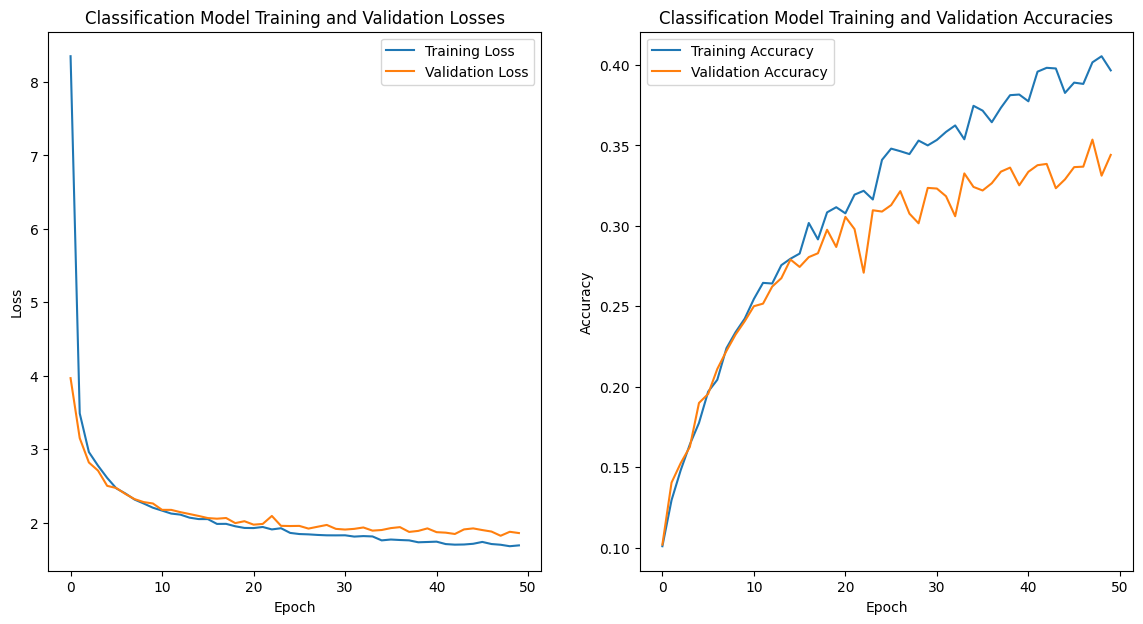

In [27]:
# Plotting results for the classification model
plt.figure(figsize=(14, 7))

# Plotting training and validation losses
plt.subplot(1, 2, 1)
plt.plot(classifier_history.history['loss'], label='Training Loss')  # Plotting training loss
plt.plot(classifier_history.history['val_loss'], label='Validation Loss')  # Plotting validation loss
plt.title('Classification Model Training and Validation Losses')  # Setting title for the subplot
plt.xlabel('Epoch')  # Labeling x-axis as Epoch
plt.ylabel('Loss')  # Labeling y-axis as Loss
plt.legend()  # Displaying legend for better understanding

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(classifier_history.history['accuracy'], label='Training Accuracy')  # Plotting training accuracy
plt.plot(classifier_history.history['val_accuracy'], label='Validation Accuracy')  # Plotting validation accuracy
plt.title('Classification Model Training and Validation Accuracies')  # Setting title for the subplot
plt.xlabel('Epoch')  # Labeling x-axis as Epoch
plt.ylabel('Accuracy')  # Labeling y-axis as Accuracy
plt.legend()  # Displaying legend for better understanding

plt.show()  # Displaying the plots

### Evaluation

In [28]:
# Evaluate the model on the entire test set
classifier_test_loss, classifier_test_accuracy = classifier.evaluate(x_test, y_test)
print(f"Classifier Test Loss: {classifier_test_loss}")
print(f"Classifier Test Accuracy: {classifier_test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.8598 - accuracy: 0.3441
Classifier Test Loss: 1.8597769737243652
Classifier Test Accuracy: 0.3440999984741211


## Task 3. Auxiliary learning [12 pts]

- **List of references:**
    - https://arxiv.org/pdf/2106.11478
    - https://link.springer.com/chapter/10.1007/978-3-319-46493-0_36
    - https://link.springer.com/chapter/10.1007/978-3-319-46493-0_36/figures/1

### Making sure the encoder is trainable

In [29]:
# Set encoder to be trainable
encoder.trainable = True

### **Part I:** Building the model

Following the architecture in the reference (https://link.springer.com/chapter/10.1007/978-3-319-46493-0_36/figures/1):

In [30]:
# Define input layer for the encoder with shape (32, 32, 3)
encoder_input = keras.Input(shape=(32, 32, 3))

# Convolutional layers for feature extraction
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)  # Convolutional layer with 32 filters, each of size (3, 3), ReLU activation, and same padding
input = keras.layers.BatchNormalization()(input)  # Batch normalization layer
input = keras.layers.MaxPooling2D((2, 2), padding='same')(input)  # Max pooling layer with pool size (2, 2) and same padding
input = keras.layers.Dropout(0.2)(input)  # Dropout layer with a dropout rate of 0.2
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)  # Second convolutional layer with same parameters as the previous one
input = keras.layers.Flatten()(input)  # Flatten layer to convert 3D output to 1D

# Encoder output
encoder_output = keras.layers.Dense(256, activation='relu')(input)  # Dense layer with 256 units and ReLU activation

# Classifier part
classifier_input = keras.layers.Dense(128, activation='relu')(encoder_output)  # Dense layer for classifier input with 128 units and ReLU activation
input = keras.layers.Dense(64, activation='relu')(input)  # Dense layer with 64 units and ReLU activation
classifier_output = keras.layers.Dense(10, activation='softmax')(input)  # Output layer for classification with 10 units and softmax activation

# Decoder part
decoder_input = keras.layers.Dense(1024, activation='relu')(encoder_output)  # Dense layer for decoder input with 1024 units and ReLU activation
input = keras.layers.Reshape((8, 8, 16))(decoder_input)  # Reshape layer to convert 1D input to 3D (8x8x16)

# Deconvolutional layers for feature reconstruction
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)  # Convolutional layer with 32 filters, each of size (3, 3), ReLU activation, and same padding
input = keras.layers.BatchNormalization()(input)  # Batch normalization layer
input = keras.layers.UpSampling2D((2, 2))(input)  # UpSampling layer with size (2, 2)
input = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)  # Convolutional layer with same parameters as the previous one
input = keras.layers.BatchNormalization()(input)  # Batch normalization layer
input = keras.layers.UpSampling2D((2, 2))(input)  # UpSampling layer with size (2, 2)

# Decoder output
decoder_output = keras.layers.Conv2D(3, (1, 1), activation='sigmoid', padding='same')(input)  # Convolutional layer for output with 3 filters, each of size (1, 1), sigmoid activation, and same padding

# Combined model
combined_model = keras.Model(encoder_input, [classifier_output, decoder_output])  # Combined model taking encoder input and outputting both classifier and decoder outputs

### **Part II:** Compling the model
- We use two loss functions:
    - `categorical crossentropy`: For the classification part
    - `MSE`: For the reconstruction part

In [31]:
# Compile the combined model with specified optimizer, loss functions, and metrics
combined_model.compile(
    optimizer='adam',  # Adam optimizer is used for training the model
    loss=['categorical_crossentropy', 'mean_squared_error'],  # Two loss functions are used: categorical crossentropy for classification task and mean squared error for reconstruction task
    metrics=['accuracy']  # Evaluation metric used during training is accuracy
)

In [32]:
combined_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 32, 32, 32)           896       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 32, 32, 32)           128       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)           0         ['batch_normalization_3[

### **Part III:** Training the model

In [33]:
# Train the combined model on training data, specifying input and output data for both classification and reconstruction tasks
combined_history = combined_model.fit(
    X_train,  # Input training data
    [Y_train, X_train],  # Output training data for both classification and reconstruction tasks
    epochs=50,  # Number of epochs for training
    batch_size=256,  # Batch size used during training
    shuffle=True,  # Shuffle the training data before each epoch
    validation_data=(x_test, [y_test, x_test])  # Validation data for both classification and reconstruction tasks
)

Epoch 1/50
20/20 [==============================] - 6s 144ms/step - loss: 2.3415 - dense_8_loss: 2.2812 - conv2d_9_loss: 0.0603 - dense_8_accuracy: 0.1788 - conv2d_9_accuracy: 0.4436 - val_loss: 2.3395 - val_dense_8_loss: 2.2794 - val_conv2d_9_loss: 0.0602 - val_dense_8_accuracy: 0.1309 - val_conv2d_9_accuracy: 0.4012
Epoch 2/50
20/20 [==============================] - 1s 36ms/step - loss: 1.9210 - dense_8_loss: 1.8864 - conv2d_9_loss: 0.0346 - dense_8_accuracy: 0.3334 - conv2d_9_accuracy: 0.4786 - val_loss: 2.2967 - val_dense_8_loss: 2.2418 - val_conv2d_9_loss: 0.0548 - val_dense_8_accuracy: 0.1301 - val_conv2d_9_accuracy: 0.3636
Epoch 3/50
20/20 [==============================] - 1s 36ms/step - loss: 1.6706 - dense_8_loss: 1.6447 - conv2d_9_loss: 0.0259 - dense_8_accuracy: 0.4128 - conv2d_9_accuracy: 0.4977 - val_loss: 2.2451 - val_dense_8_loss: 2.1959 - val_conv2d_9_loss: 0.0493 - val_dense_8_accuracy: 0.2099 - val_conv2d_9_accuracy: 0.4294
Epoch 4/50
20/20 [========================

### Ploting the values we got

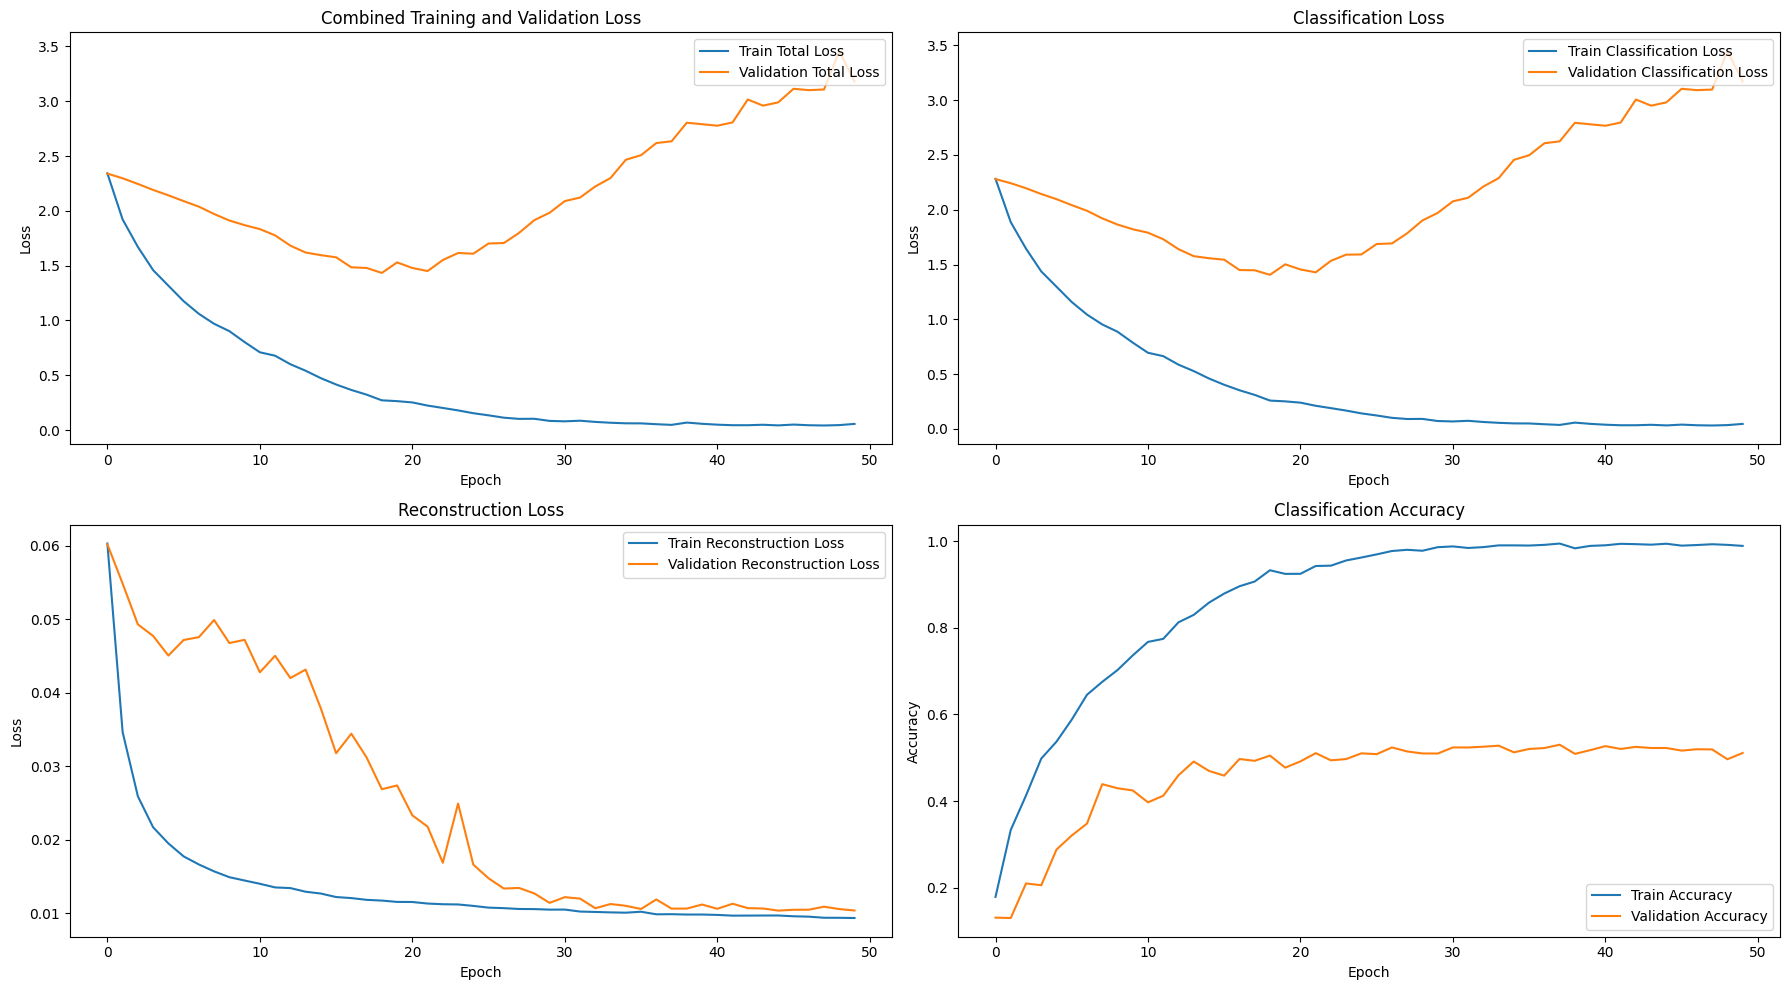

In [35]:
# Plot settings
plt.figure(figsize=(18, 10))

# Plot 1: Combined Training and Validation Loss
plt.subplot(2, 2, 1)
plt.plot(combined_history.history['loss'], label='Train Total Loss')  # Plotting total training loss
plt.plot(combined_history.history['val_loss'], label='Validation Total Loss')  # Plotting total validation loss
plt.title('Combined Training and Validation Loss')  # Setting title for the subplot
plt.xlabel('Epoch')  # Labeling x-axis as Epoch
plt.ylabel('Loss')  # Labeling y-axis as Loss
plt.legend(loc='upper right')  # Displaying legend at upper right corner

# Plot 2: Classification Loss
plt.subplot(2, 2, 2)
plt.plot(combined_history.history['dense_8_loss'], label='Train Classification Loss')  # Plotting classification training loss
plt.plot(combined_history.history['val_dense_8_loss'], label='Validation Classification Loss')  # Plotting classification validation loss
plt.title('Classification Loss')  # Setting title for the subplot
plt.xlabel('Epoch')  # Labeling x-axis as Epoch
plt.ylabel('Loss')  # Labeling y-axis as Loss
plt.legend(loc='upper right')  # Displaying legend at upper right corner

# Plot 3: Reconstruction Loss
plt.subplot(2, 2, 3)
plt.plot(combined_history.history['conv2d_9_loss'], label='Train Reconstruction Loss')  # Plotting reconstruction training loss
plt.plot(combined_history.history['val_conv2d_9_loss'], label='Validation Reconstruction Loss')  # Plotting reconstruction validation loss
plt.title('Reconstruction Loss')  # Setting title for the subplot
plt.xlabel('Epoch')  # Labeling x-axis as Epoch
plt.ylabel('Loss')  # Labeling y-axis as Loss
plt.legend(loc='upper right')  # Displaying legend at upper right corner

# Plot 4: Classification Accuracy
plt.subplot(2, 2, 4)
plt.plot(combined_history.history['dense_8_accuracy'], label='Train Accuracy')  # Plotting training accuracy
plt.plot(combined_history.history['val_dense_8_accuracy'], label='Validation Accuracy')  # Plotting validation accuracy
plt.title('Classification Accuracy')  # Setting title for the subplot
plt.xlabel('Epoch')  # Labeling x-axis as Epoch
plt.ylabel('Accuracy')  # Labeling y-axis as Accuracy
plt.legend(loc='lower right')  # Displaying legend at lower right corner

plt.tight_layout()  # Adjusting subplot layout to prevent overlap
plt.show()  # Displaying the plots


### Evaluation

In [36]:
# Evaluate the combined model on the entire test set
combined_history_test = combined_model.evaluate(x_test, [y_test, x_test])
print(f"Combined Model Test Loss: {combined_history_test[0]}")
print(f"Combined Model Test Classification Loss: {combined_history_test[1]}")
print(f"Combined Model Test Reconstruction Loss: {combined_history_test[2]}")
print(f"Combined Model Test Classification Accuracy: {combined_history_test[3]}")
print(f"Combined Model Test Reconstruction Accuracy: {combined_history_test[4]}")

313/313 [==============================] - 2s 5ms/step - loss: 3.1807 - dense_8_loss: 3.1703 - conv2d_9_loss: 0.0104 - dense_8_accuracy: 0.5110 - conv2d_9_accuracy: 0.7071
Combined Model Test Loss: 3.180701971054077
Combined Model Test Classification Loss: 3.170301914215088
Combined Model Test Reconstruction Loss: 0.010398338548839092
Combined Model Test Classification Accuracy: 0.5109999775886536
Combined Model Test Reconstruction Accuracy: 0.7070982456207275
